# Task Description : 
Develop a kNN model for regression to predict the bioconcentration factor (BCF) for the given data **(see in code line 2)**. Please keep in mind the following:


*   1 bonus point - **(functioning model)** and 1 bonus point - **(top 5 models)**.
*   Submission Deadline is **May 12, 23:59**.

**Note: Submission is not compulsory**.





*We expect you to upload only 'one' python file with name ***Bonus_Task_1_yourname*** on elearning in exactly the same format as explained below.*

In [ ]:
# import all libraries  (You can import other libraries if required)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error        # to be used for regression model
from sklearn.metrics import r2_score 
from sklearn.model_selection import LeaveOneOut
from tqdm.notebook import tqdm
%matplotlib inline

In [ ]:
# upload data here
if 'google.colab' in str(get_ipython()):
  df_bcf = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/BCF_training.csv")
else:
  df_bcf = pd.read_csv("references/BCF_training.csv")
  
df_bcf.head()

In [ ]:
df_bcf.dtypes

**Question 1:** perform data cleaning if required and define corresponding variables for [inputs /features]  and [corresponding output (Experimental values)]

In [ ]:
missing_data = df_bcf.isnull()
missing_data

In [ ]:
# checking for null value 
for column in missing_data.columns.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

In [ ]:
# non zero experimental values 
# non_zero_data = df_bcf[df_bcf['Experimental value [log(L/kg)]']!=0]
# non_zero_data

In [ ]:
# X = non_zero_data.drop(['CAS','SMILES','Experimental value [log(L/kg)]'],axis=1)
# X
X = df_bcf.drop(['CAS','SMILES','Experimental value [log(L/kg)]'],axis=1)
X

In [ ]:
# y = non_zero_data['Experimental value [log(L/kg)]'].to_numpy()
# y
y = df_bcf['Experimental value [log(L/kg)]'].to_numpy()
y

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
X_scaled = scaler.transform(X)
X_scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
print('Training points: ', len(y_train))
print('Training points: ', len(y_test))

Training points:  640
Training points:  160


**Question 2:** do cross validation with different k values and visualize (R2_square vs k and MSE vs k) to know what k value performs best on your testing data.

In [46]:
# create a KNeighborsRegressor model with different k
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

cross_r2 = cross_val_score(knn, X, y, cv=10)

cross_mse = -1 * cross_val_score(knn, X, y, cv=10,scoring='neg_mean_squared_error')

print("When k is", k, "\n")
print("The average R-squared of the folds is", cross_r2.mean(), "and the standard deviation is" , cross_r2.std(), "\n")
print("The average mean squared errors of the folds is", cross_mse.mean(), "and the standard deviation is" , cross_mse.std())

When k is 5 

The average R-squared of the folds is 0.36905655523438197 and the standard deviation is 0.28362280877804036 

The average mean squared errors of the folds is 0.9241860228999998 and the standard deviation is 0.23794148626107114


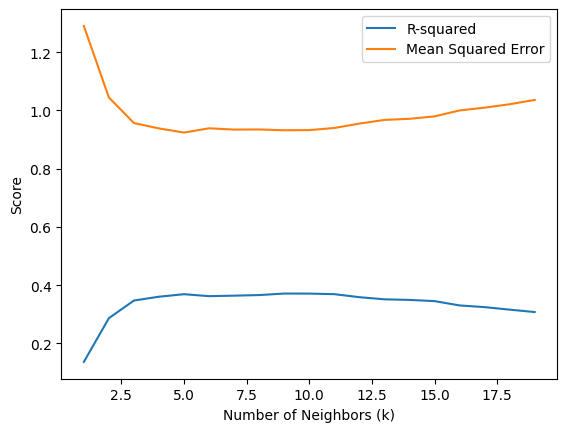

In [ ]:
# set the range of k values to test
k_range = range(1, 20)

# create an empty list to store the R-squared scores for each value of k
r2_scores = []

# create an empty list to store the mean squared errors for each value of k
mse_scores = []

# perform k-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    kfold = 10  #KFold(n_splits=10, shuffle=True, random_state=42)
    r2 = cross_val_score(knn, X, y, cv=kfold, scoring='r2')
    mse = cross_val_score(knn, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores.append(r2.mean())
    mse_scores.append(abs(mse.mean()))

# plot the results
plt.plot(k_range, r2_scores, label='R-squared')
plt.plot(k_range, mse_scores, label='Mean Squared Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.show()






**Question 3**: final trained model using all the data points with your k value (Please do not calculate any performance metrics, we will do that on our own by checking performance of your model on our testing dataset)

#First approach, using the training data

In [ ]:
# set the value of k that performed best during cross-validation
k = 3

# create a KNeighborsRegressor model with the chosen value of k
knn = KNeighborsRegressor(n_neighbors=k)

# train the model on the training data points
knn.fit(X_train, y_train)

# use the trained model to make predictions on new data (e.g. your testing dataset)
y_pred = knn.predict(X_test)
y_pred


In [ ]:
mse = mean_squared_error(y_pred, y_test)
print("The mean squared error between the testing data and the predicted data is \n",mse)

The mean squared error between the testing data and the predicted data is 
 0.5691611875


In [ ]:
r2 = r2_score(y_pred, y_test)
print("The R-squared between the testing data and the predicted data is \n",r2)

The R-squared between the testing data and the predicted data is 
 0.5573223492386574


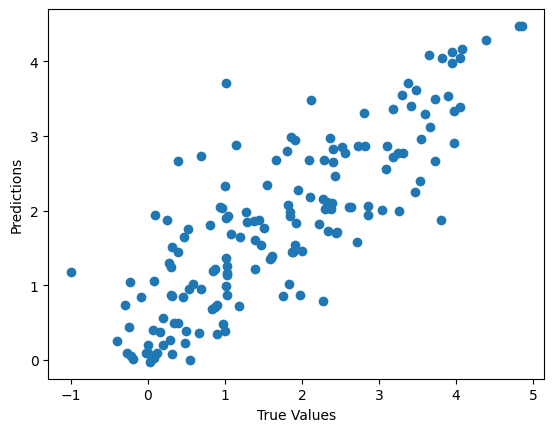

In [ ]:
import matplotlib.pyplot as plt

# plot the predicted values against the true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#Second Approach, using all data points for training and testing

In [ ]:
# set the value of k that performed best during cross-validation
k = 3

# create a KNeighborsRegressor model with the chosen value of k
knn = KNeighborsRegressor(n_neighbors=k)

# train the model on all the data points
knn.fit(X, y)

# use the trained model to make predictions on new data (e.g. your testing dataset)
y_pred2 = knn.predict(X)
y_pred2


In [ ]:
mse = mean_squared_error(y_pred2, y)
print("The mean squared error between the testing data and the predicted data is \n",mse)

The mean squared error between the testing data and the predicted data is 
 0.4253466333333333


In [ ]:
r2 = r2_score(y_pred2, y)
print("The R-squared between the testing data and the predicted data is \n",r2)

The R-squared between the testing data and the predicted data is 
 0.6757262074734278


using k = 1, the predicted values where closely related to the testing data. This is because the model only considers the closest neighbours, this is impractical as it could results in overfitting, where the algorithm may capture noise or outliers in the training dataset and perform poorly on new data.

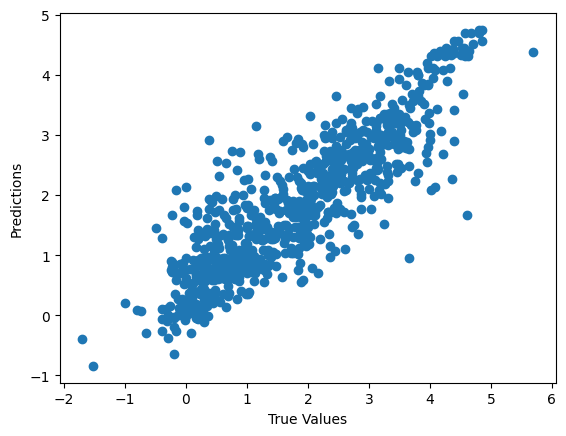

In [ ]:
import matplotlib.pyplot as plt

# plot the predicted values against the true values
plt.scatter(y, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


**Note:**  
You have choice to use subset of input features or all input features for validation and training final model. You can search keywords on google like *'how to select important input features for training regression Machine Learning models'* or you can randomly try different input feature combinations as of now to see if it improves performance on test set. However we donot expect you to choose subset of input variables (as it is not taught yet). You can simply choose all the given features as inputs.
